In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/zikrach/mlcourse_open/master/data/howpop_train.csv')

In [4]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [5]:
df.shape

(134137, 17)

In [6]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/jugru/blog/302316/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [155]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [10]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [19]:
df['year'] = df.published.apply(lambda ts: ts.year)
df['month'] = df.published.apply(lambda ts: ts.month)
df['day'] = df.published.apply(lambda ts: ts.day)
df['dayofweek'] = df.published.apply(lambda ts: ts.isoweekday())
df['hour'] = df.published.apply(lambda ts: ts.hour)

## 1. В каком месяце (и какого года) было больше всего публикаций?¶##

In [20]:
quantity_2015_1 = df[df['year'] == 2015].groupby('month').count()['post_id'].drop([11,12])

In [21]:
quantity_2016_1 = df[df['year'] == 2016].groupby('month').count()['post_id']

In [22]:
new_df_1 = pd.DataFrame(index=quantity_2015_1.index,data={'2015' : quantity_2015_1, '2016' : quantity_2016_1})

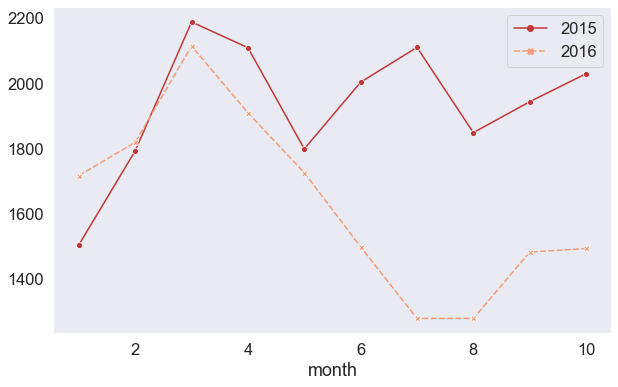

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df_1, markers=True);

## 2. Проанализируйте публикации в месяце из предыдущего вопроса ##

Один или несколько дней сильно выделяются из общей картины *False*

На хабре всегда больше статей, чем на гиктаймсе *False*

По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей *True*???

In [75]:
strange_days = df[(df['year'] == 2015) & (df['month'] == 3)].groupby('day').count()

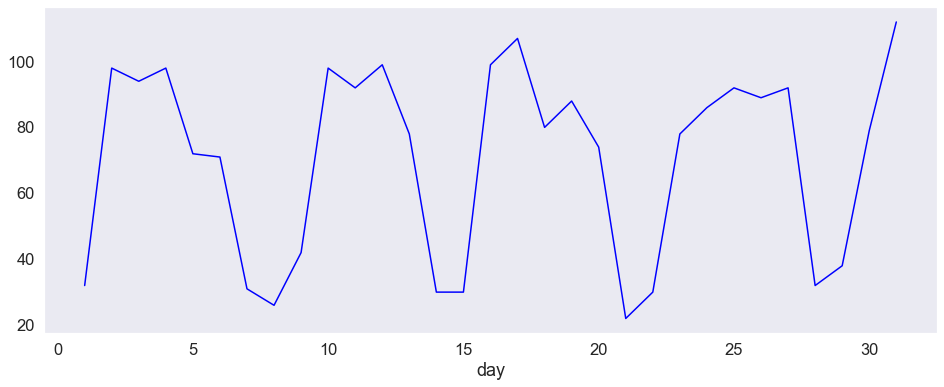

In [156]:
fig = plt.subplots(figsize=(16, 6))
sns.lineplot(x=strange_days.index, y=strange_days['post_id'].values, color='blue');

In [122]:
habr = df[(df['year'] == 2015) & (df['month'] == 3) & (df['domain'] == 'habrahabr.ru')].groupby('day').count()

In [123]:
geek = df[(df['year'] == 2015) & (df['month'] == 3) & (df['domain'] == 'geektimes.ru')].groupby('day').count()

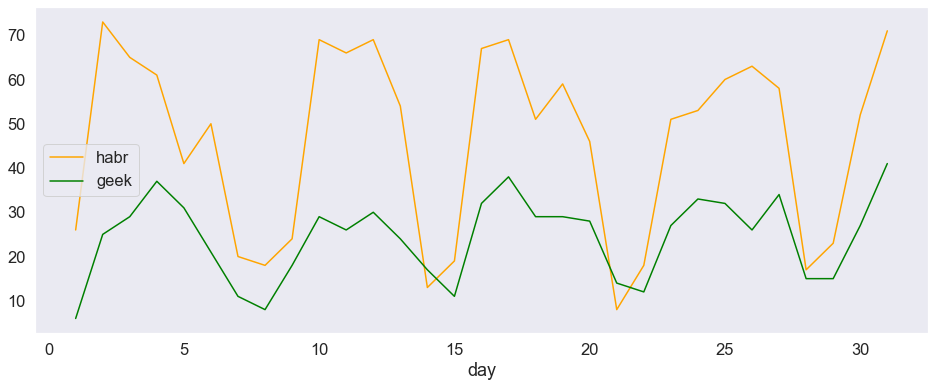

In [157]:
fig, axs = plt.subplots(ncols=1, figsize=(16, 6));
sns.lineplot(x=habr.index, y=habr['post_id'].values, color='orange', label="habr");
sns.lineplot(x=geek.index, y=geek['post_id'].values, color='green', label="geek");
axs.legend();

In [159]:
saturdays = df[(df['year'] == 2015) & (df['month'] == 3) & (df['dayofweek'] == 6)].pivot_table(index='day',
                                                                                   values='title', 
                                                                                   aggfunc='count',
                                                                                   columns='domain')

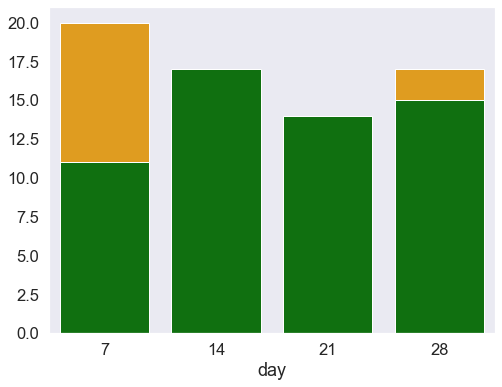

In [170]:
fig, axs = plt.subplots(ncols=1, figsize=(8, 6))
sns.barplot(x=saturdays.index, y=saturdays['habrahabr.ru'].values, color='orange');
sns.barplot(x=saturdays.index, y=saturdays['geektimes.ru'].values, color='green');

## 3. Когда лучше всего публиковать статью? ##

    1. Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
    2. У опубликованных в 10 утра постов больше всего комментариев
    3. Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
    4. Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
    5. На хабре дневные статьи комментируют чаще, чем вечерние

In [171]:
views = df.groupby('hour')['views'].mean()

In [172]:
comments = df.groupby('hour')['comments'].mean()

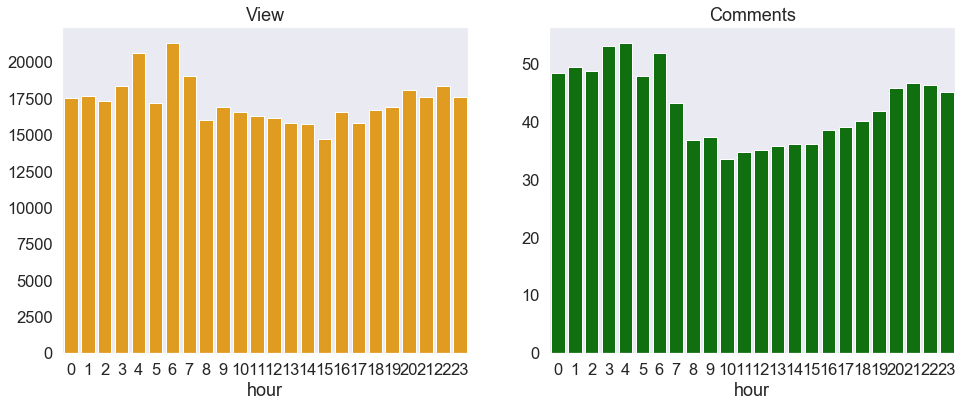

In [173]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.barplot(x=views.index, y=views.values, color='orange', ax=axs[0]).set_title("View");
sns.barplot(x=comments.index, y=comments.values, color='green', ax=axs[1]).set_title("Comments");

In [176]:
df[df['domain'] == 'geektimes.ru'][['comments', 'hour']].sort_values(by='comments', ascending=False).head()

,comments,hour
38763,2266,2
65285,1887,20
38742,1829,17
126328,1578,21
127407,1214,12


In [174]:
habr_comment = df[df['domain'] == 'habrahabr.ru'].groupby('hour')['comments'].mean()

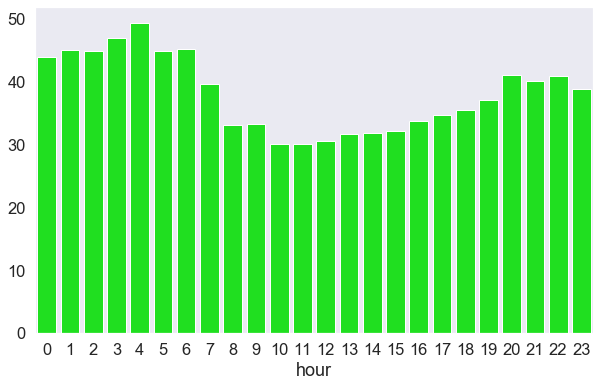

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(x=habr_comment.index, y=habr_comment.values, color='lime');

## 4. Кого из топ-20 авторов (по числу статей) чаще всего минусуют? ##

In [177]:
negative = df[df['author'].isin(df['author'].value_counts().head(20).index)][['author', 'votes_minus']].\
            groupby('author').mean().sort_values(by='votes_minus', ascending=False)

In [178]:
negative

,votes_minus
author,
@Mithgol,20.481081
@Jeditobe,16.491713
@XaocCPS,15.286913
@andorro,13.654676
@aleksandrit,9.974643
@Sterhel,9.350785
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5. Сравните субботы и понедельники ##

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? **НЕТ**


In [186]:
saturday = df[df['dayofweek'] == 6].groupby('hour').count()['post_id']

In [469]:
monday = df[df['dayofweek'] == 1].groupby('hour').count()['post_id']

In [477]:
sat_vs_mon = pd.DataFrame(data={'Day of the Week' : "Saturday", 'Quantity' : saturday}).\
            append(pd.DataFrame(data={'Day of the Week' : "Monday", 'Quantity' : monday}),ignore_index=False)

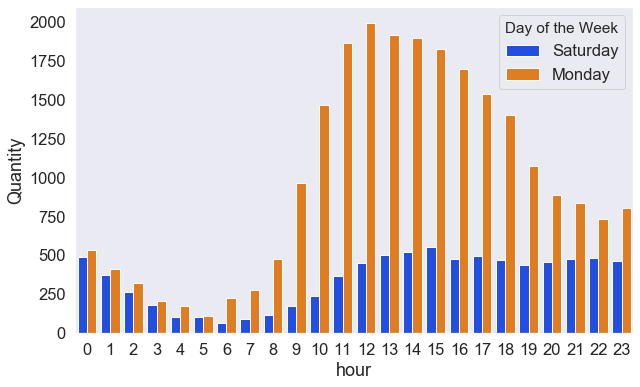

In [478]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sat_vs_mon.index, y=sat_vs_mon['Quantity'],
           hue=sat_vs_mon['Day of the Week'],
           palette='bright');